# RAG-Llama-3.2-3B Model Evaluation

<hr> <hr>


In [ ]:
%%capture
!pip install datasets
!pip install bitsandbytes peft trl accelerate transformers huggingface_hub
# !pip install gradio
!pip install evaluate
!pip install sacrebleu rouge_score jiwer cer

# Evaluation

In [ ]:
from datasets import Dataset, load_dataset
from torch.utils.data import DataLoader
import torch
from tqdm import tqdm
import pandas as pd
import evaluate
llama_y_pred_y_test = pd.read_csv("/content/drive/MyDrive/msc_project/rag_llama_y_true_y_pred.csv")

y_pred  = llama_y_pred_y_test["y_pred"].tolist()
y_true = llama_y_pred_y_test["y_true"].tolist()

sacrebleu = evaluate.load("sacrebleu")
results = sacrebleu.compute(predictions=y_pred, references=y_true)
results['score']

96.26057158172016

In [ ]:
llama_y_pred_y_test

,y_pred,y_true
0,"Yes, University of Westminster provides a cour...","Yes, University of Westminster provides a cour..."
1,"Yes, University of Westminster provides a cour...","Yes, University of Westminster provides a cour..."
2,"Yes, University of Westminster provides a cour...","Yes, University of Westminster provides a cour..."
3,"Yes, University of Westminster provides a cour...","Yes, University of Westminster provides a cour..."
4,"Yes, University of Westminster provides a cour...","Yes, University of Westminster provides a cour..."
...,...,...
64,"Yes, University of Westminster provides a cour...","Yes, University of Westminster provides a cour..."
65,"Yes, University of Westminster provides a cour...","Yes, University of Westminster provides a cour..."
66,"Yes, University of Westminster provides a cour...","Yes, University of Westminster provides a cour..."
67,"Yes, University of Westminster provides a cour...","Yes, University of Westminster provides a cour..."


In [ ]:
scoreboard = {}
scoreboard.update({'bleu_score':results['score']})

## CER Score

In [ ]:
exact_match_metric = evaluate.load("character")
results2 = exact_match_metric.compute(predictions=y_pred, references=y_true)
results2

{'cer_score': 0.04334200749406076}

## Meteor Score

In [ ]:
meteor = evaluate.load('meteor')
result3 = meteor.compute(predictions=y_pred, references=y_true)
result3

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


{'meteor': 0.9649423295396355}

## Rouge Score

In [ ]:
rouge = evaluate.load('rouge')
result4 = rouge.compute(predictions=y_pred, references=y_true)
result4

{'rouge1': 0.982528857793143,
 'rouge2': 0.9700921409298096,
 'rougeL': 0.981978426194889,
 'rougeLsum': 0.9824477101693125}

In [ ]:

scoreboard.update(results2)
scoreboard.update(result3)
scoreboard.update(result4)
scoreboard.update({'model':'RAG-llama'})

In [ ]:
scoreboard

{'bleu_score': 96.26057158172016,
 'cer_score': 0.04334200749406076,
 'meteor': 0.9649423295396355,
 'rouge1': 0.982528857793143,
 'rouge2': 0.9700921409298096,
 'rougeL': 0.981978426194889,
 'rougeLsum': 0.9824477101693125,
 'model': 'RAG-llama'}

In [ ]:
x = pd.DataFrame.from_dict([scoreboard])

In [ ]:
x

,bleu_score,cer_score,meteor,rouge1,rouge2,rougeL,rougeLsum,model
0,96.260572,0.043342,0.964942,0.982529,0.970092,0.981978,0.982448,RAG-llama


In [ ]:
import torch
import pandas as pd
import evaluate
df = pd.read_csv("/content/drive/MyDrive/msc_project/model_results.csv")
df

,bleu_score,cer_score,meteor,rouge1,rouge2,rougeL,rougeLsum,model
0,49.938569,0.450135,0.796419,0.694390,0.654254,0.686169,0.692310,gemma
1,76.661574,0.234241,0.807951,0.879088,0.815652,0.872806,0.878410,mistral
2,85.979319,0.137935,0.903607,0.904733,0.867881,0.905276,0.904084,llama
3,3.097212,0.815136,0.133333,0.151899,0.051064,0.118143,0.151899,phi
4,96.260572,0.043342,0.964942,0.982529,0.970092,0.981978,0.982448,RAG-llama


## Saving Model Information

In [ ]:
import pandas as pd
try:
    df = pd.read_csv("/content/drive/MyDrive/msc_project/model_results.csv")
    df = pd.concat([df,x])
    df.reset_index(drop=True, inplace=True)
    df.to_csv("/content/drive/MyDrive/msc_project/model_results.csv",index=False)
except:
    x.to_csv("/content/drive/MyDrive/msc_project/model_results.csv",index=False)
finally:
    df = pd.read_csv("/content/drive/MyDrive/msc_project/model_results.csv")

In [ ]:
df

,bleu_score,cer_score,meteor,rouge1,rouge2,rougeL,rougeLsum,model
0,49.938569,0.450135,0.796419,0.694390,0.654254,0.686169,0.692310,gemma
1,76.661574,0.234241,0.807951,0.879088,0.815652,0.872806,0.878410,mistral
2,85.979319,0.137935,0.903607,0.904733,0.867881,0.905276,0.904084,llama
3,3.097212,0.815136,0.133333,0.151899,0.051064,0.118143,0.151899,phi
4,96.260572,0.043342,0.964942,0.982529,0.970092,0.981978,0.982448,RAG-llama


# Main Visualizations

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
plt.figure(figsize=(6, 10))
sns.set_theme(style="whitegrid")
sns.set_context("notebook")
sns.set_palette('dark')

<Figure size 600x1000 with 0 Axes>

## Before RAG


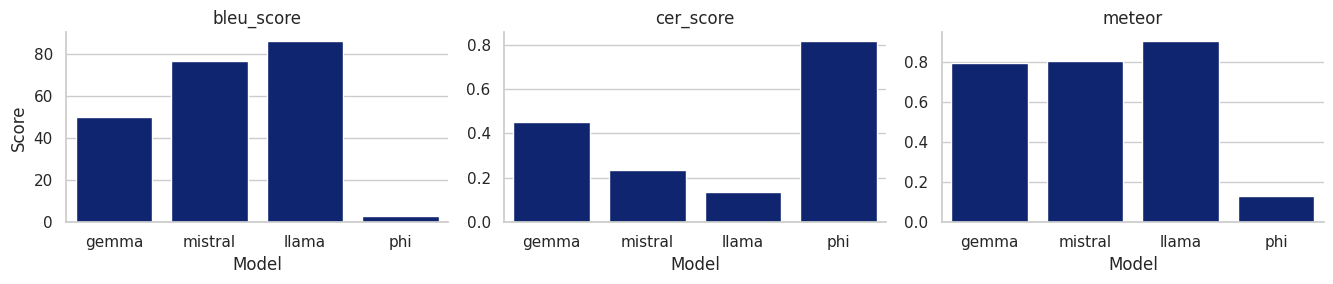

In [ ]:
df1 = df.iloc[:-1]
df_melted = df1.melt(id_vars="model",
                    value_vars=["bleu_score", "cer_score", "meteor",],
                    var_name="metric",
                    value_name="score")

g = sns.FacetGrid(df_melted, col="metric", col_wrap=3, height=3,aspect=1.5,sharey=False)
g.map(sns.barplot, "model", "score", order=df1["model"].unique())
g.set_titles("{col_name}")
g.set_axis_labels("Model", "Score")
for ax in g.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(0)

# plt.tight_layout()
plt.show()


## After RAG Tunning

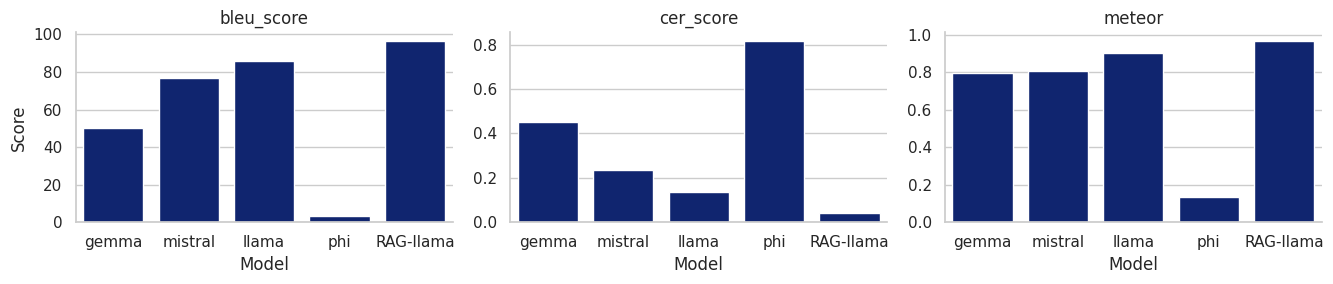

In [ ]:
df_melted = df.melt(id_vars="model",
                    value_vars=["bleu_score", "cer_score", "meteor",],
                    var_name="metric",
                    value_name="score")

g = sns.FacetGrid(df_melted, col="metric", col_wrap=3, height=3,aspect=1.5,sharey=False)
g.map(sns.barplot, "model", "score", order=df["model"].unique())
g.set_titles("{col_name}")
g.set_axis_labels("Model", "Score")
for ax in g.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(0)

# plt.tight_layout()
plt.show()
